In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [12]:
ds = pd.read_csv("C:/Users/12169/Desktop/CWRU/senior project/Recommendation system/content-based data.csv")
ds = ds.dropna()
ds.head()

,id,name,type,description,UserId,ProductId,Rating,Timestamp
0,1,Active classic boxers,accessory,Active classic boxers - There's a reason why o...,A39HTATAQ9V7YF,205616461,5,1369699200
1,2,Active sport boxer briefs,underwear,Active sport boxer briefs - Skinning up Glory ...,A3JM6GV9MNOF9X,558925278,3,1355443200
2,3,Active sport briefs,underwear,Active sport briefs - These superbreathable no...,A1Z513UWSAAO0F,558925278,5,1404691200
3,4,Alpine guide pants,bottom,"Alpine guide pants - Skin in, climb ice, switc...",A1WMRR494NWEWV,733001998,4,1382572800
4,5,Alpine wind jkt,topwear,"Alpine wind jkt - On high ridges, steep ice an...",A3IAAVS479H7M7,737104473,1,1274227200


In [14]:
popular_products = pd.DataFrame(ds.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
3227001381,25
1304351475,16
602260074X,15
535795531X,12
1403790965,11
5357955948,11
6022600790,9
6022600812,7
535795545X,7


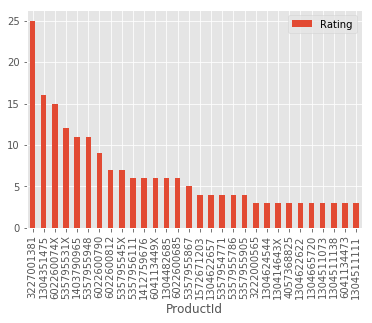

In [15]:
most_popular.head(30).plot(kind = "bar")

In [16]:
ratings_utility_matrix = ds.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,...,604113449X,6041134511,6053640972,6117036094,6117043058,6152000416,6162071103,733001998,737104473,762451459
UserId,,,,,,,,,,,,,,,,,,,,,
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
A100GYE1W4OXZ8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10REFE1TW3ZVT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10ZKDOZOSH219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A11AT6B3912DCU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
ratings_utility_matrix.shape
X = ratings_utility_matrix.T
X.head()

UserId,A024581134CV80ZBLIZTZ,A100GYE1W4OXZ8,A10REFE1TW3ZVT,A10ZKDOZOSH219,A11AT6B3912DCU,A11OEJ4R1PDTLN,A11Q1HQ84F8POH,A120LZ9VNR3YI0,A138ATFNJU102C,A13IIHXY0QX4Y4,...,AVCSVH9L0BPIF,AVOGV98AYOFG2,AVQP6PO1NK0IJ,AWL41OE56O3O3,AXVLSEEYTC4Z9,AYHZNXRPOHMO2,AYI1LDJYGG0ZK,AZ4FR14IPKML7,AZLE2XFH3JUNG,AZWRTJPN7NXT
ProductId,,,,,,,,,,,,,,,,,,,,,
1304139212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414089X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414643X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304146537,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0


In [19]:
X1 = X
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(103, 103)

In [21]:
X.index[99]
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(103,)

In [27]:
Recommend = list(X.index[correlation_product_ID > 0.80])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['558925278', '6117043058']